In [2]:
from sklearn.utils import shuffle
import  pandas as pd
import numpy as  np
# 题目三、实现广告点击率预估数据建模（35分）。
# 利用sample.csv数据集,选择合适模型,解决广告点击率预估问题。
# 标签值：'is_act'
# 1、读取数据并查看前5行和基本信息。（3分）
a1=pd.read_csv('E:\\python代码\\lx-yk\\data-yk\\yk4\\sample.csv')
print('读取数据并查看前5行\n',a1.head(5))
print('基本信息\n',a1.info)

# 2、将数据集洗牌打乱顺序,提高模型的泛化能力（5分）
a1= shuffle(a1)
a1            
# 3、将数据集划分成训练集和测试集,自主选择至少两种算法(5分)
from sklearn.model_selection import train_test_split
x=a1.drop('is_act',axis=1)
y=a1['is_act']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
#算法1
from sklearn.ensemble import RandomForestClassifier
sj = RandomForestClassifier(max_depth=1000, min_samples_split=2, min_samples_leaf=1)#随机森林

#算法2
from sklearn.linear_model import LogisticRegression
lj = LogisticRegression(C=1.0, max_iter=100)#逻辑回归


# 4、使用网格搜索对模型进行调优,输出最佳参数组合（7分）
#=====================================随机森林
from sklearn.model_selection import GridSearchCV
sj_cs={'n_estimators': [100, 200, 300], 'max_depth': [2, 5, 10]}
search_sj = GridSearchCV(sj, sj_cs, cv=5)
search_sj.fit(x_train, y_train)
print("随机森林最佳参数组合（\n",search_sj.best_params_)#哪组参数是最好的，

#=====================================逻辑回归
lj_cs={'C': [0.1, 1, 10]}
search_lj = GridSearchCV(lj, lj_cs, cv=5)
search_lj.fit(x_train, y_train)
print("逻辑回归最佳参数组合（\n",search_lj.best_params_)#哪组参数是最好的

# 5、输出模型特征重要性(权重)（5分）
# #TODO：=====================================随机森林

#使用这组最好的参数训练出来的模型。
t5_sj=search_sj.best_estimator_
print("随机森林--特征重要性(\n",t5_sj)

# # 6、选用合适的评估指标对模型进行评估（5分）
from sklearn.metrics import accuracy_score, recall_score, f1_score
yc_sj6=t5_sj.predict(x_test)
# 评估

sj_accuracy = accuracy_score(y_test, yc_sj6)
sj_recall = recall_score(y_test, yc_sj6)
sj_f1 = f1_score(y_test, yc_sj6)

print('随机森林准确率：', sj_accuracy)
print('随机森林召回率：', sj_recall)
print('随机森林 F1 值：', sj_f1)

# # 评估
t5_lj=search_lj.best_estimator_
yc_lj6=t5_lj.predict(x_test)
lj_accuracy = accuracy_score(y_test, yc_lj6)
lj_recall = recall_score(y_test, yc_lj6)
lj_f1 = f1_score(y_test, yc_lj6)

print('逻辑回归准确率：', lj_accuracy)
print('逻辑回归召回率：', lj_recall)
print('逻辑回归 F1 值：', lj_f1)

读取数据并查看前5行
    tag_104013  tag_104014  tag_104016  tag_104017  tag_104018  tag_104019  \
0           2           0           0           2           0           0   
1           2           0           0           0           2           0   
2           2           0           0           0           0           2   
3           2           0           0           0           2           0   
4           1           2           0           2           0           0   

   tag_104020  tag_104563  tag_112950  tag_121711  ...  r6  r7  r8  r9  g1  \
0           0           0           1           0  ...   0   0   0   0   0   
1           0           0           0           0  ...   0   1   0   0   0   
2           0           0           0           0  ...   0   0   0   0   0   
3           0           0           0           0  ...   0   0   0   0   0   
4           0           0           0           0  ...   0   0   0   0   0   

   g2  g3  g4  g5  g6  
0   0   1   0   0   0  
1   1   

D:\Jupyter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Jupyter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


逻辑回归最佳参数组合（
 {'C': 0.1}
随机森林--特征重要性(
 RandomForestClassifier(max_depth=10, n_estimators=300)
随机森林准确率： 0.8446558644269362
随机森林召回率： 0.10931899641577061
随机森林 F1 值： 0.18929402637703646
逻辑回归准确率： 0.8442099004013677
逻辑回归召回率： 0.13709677419354838
逻辑回归 F1 值： 0.2259970457902511


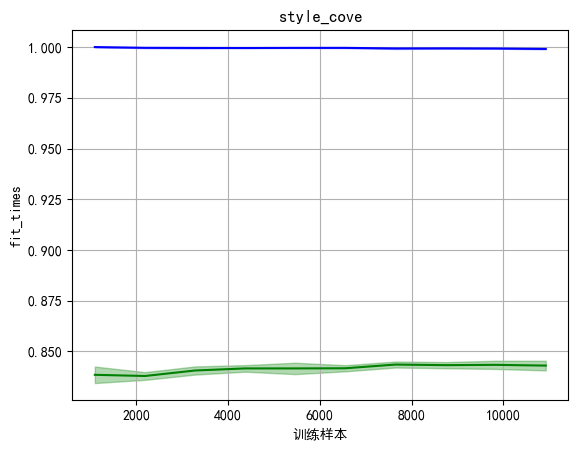

In [4]:
# 7、默认绘制学习率、ROC曲线,可自主选择其他,并使用最优模型预测数据集,并保存模型(5分)
# 绘制学习曲线

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(sj, x_train, y_train, train_sizes=np.linspace(0.1, 1.0,10),cv=5,n_jobs=-1)

plt.plot(train_sizes,np.mean(train_scores,axis=1) ,color='blue', label='培训成绩')#
plt.fill_between(train_sizes,np.mean(train_scores,axis=1) - np.std(train_scores,axis=1),np.mean(train_scores,axis=1) + np.std(train_scores,axis=1),alpha=0.3,color="blue")

plt.plot(train_sizes,np.mean(test_scores,axis=1) ,color='green', label='交叉验证分数')#
plt.fill_between(train_sizes,np.mean(test_scores,axis=1) - np.std(test_scores,axis=1),np.mean(test_scores,axis=1) + np.std(test_scores,axis=1),alpha=0.3, color="green")
plt.grid()#网格
plt.xlabel("训练样本")
plt.ylabel("fit_times")
plt.title("style_cove")#标题
plt.show()

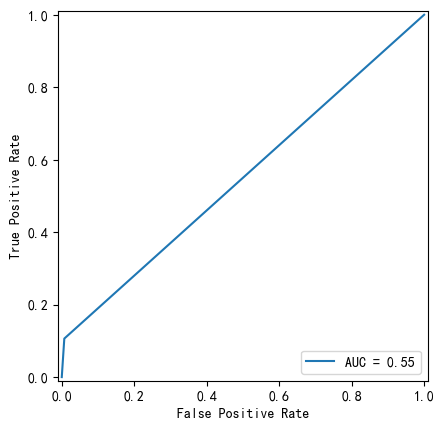

In [17]:
#ROC曲线
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, yc_lj6)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()


In [18]:
import joblib

#并使用最优模型预测数据集,并保存模型

t5_sj1=search_sj.best_estimator_
joblib.dump(t5_sj1, 'E:\\python代码\\lx-yk\\data-yk\\yk4\\a1.pkl')

t5_lj1=search_lj.best_estimator_
joblib.dump(t5_lj1, 'E:\\python代码\\lx-yk\\data-yk\\yk4\\a2.pkl')

['E:\\python代码\\lx-yk\\data-yk\\yk4\\a2.pkl']